#**Iman Noor**
**Email: imannoor2002@gmail.com**

#**Credit Card Fraud Detection**

##**1. Introduction**
The dataset contains transactions made by credit cards in September 2013 by European cardholders.

##**2. Problem Definition**
Build a machine learning model to identify fraudulent credit card
transactions.

##**3. Features**
- Features **V1, V2, … V28** are the principal components obtained with **PCA**, the only features which have not been transformed with PCA are `Time` and `Amount`.
- Feature **Time** contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature **Amount** is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
- Feature **Class** is the response variable and it takes value `1` in case of fraud and `0` otherwise.

##**Importing libraries**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

##**Load the data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
df.shape

(284807, 31)

##**Exploratory data analysis (EDA)**

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.duplicated().sum()

1081

In [7]:
df = df.drop_duplicates()

In [8]:
# Finding how many of each class there
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [9]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

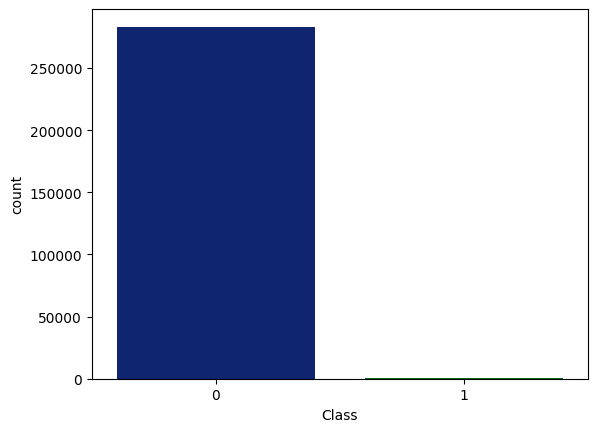

In [10]:
plt.style.use('seaborn-v0_8-dark-palette')
sns.countplot(data=df, x='Class')
plt.show();

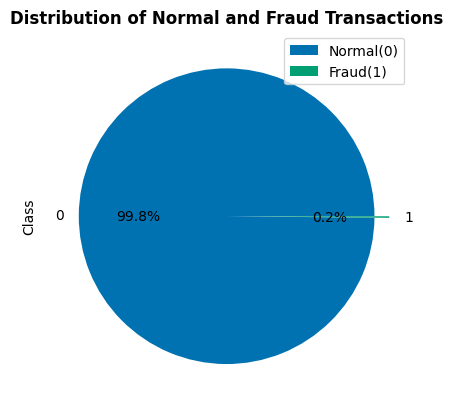

In [11]:
plt.style.use('seaborn-v0_8-colorblind')
df['Class'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0, 0.1])
plt.legend(['Normal(0)', 'Fraud(1)'])
plt.title('Distribution of Normal and Fraud Transactions', weight='bold')
plt.show();

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [13]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


##**Data Visualization**

<Axes: >

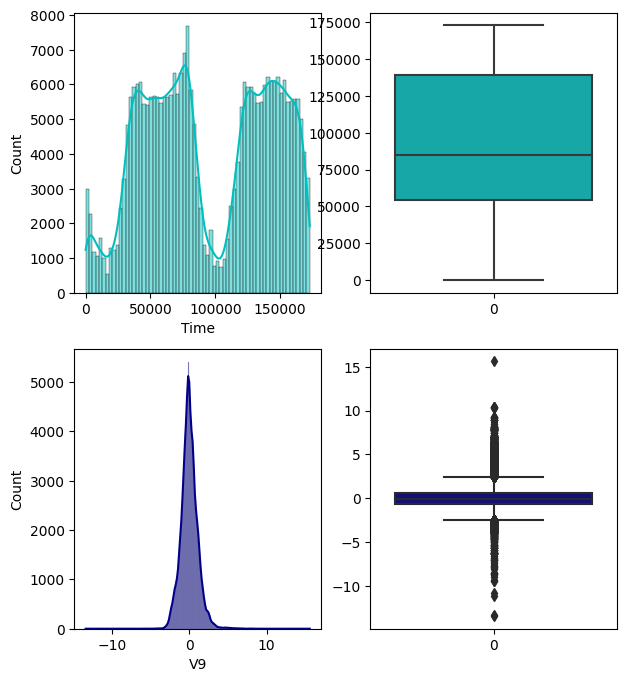

In [15]:
plt.figure(figsize=(7, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Time'], color='c',kde=True)
plt.subplot(2, 2, 2)
sns.boxplot(df['Time'], color='c')
plt.subplot(2, 2, 3)
sns.histplot(df['V9'], color='darkblue',kde=True)
plt.subplot(2, 2, 4)
sns.boxplot(df['V9'], color='darkblue')

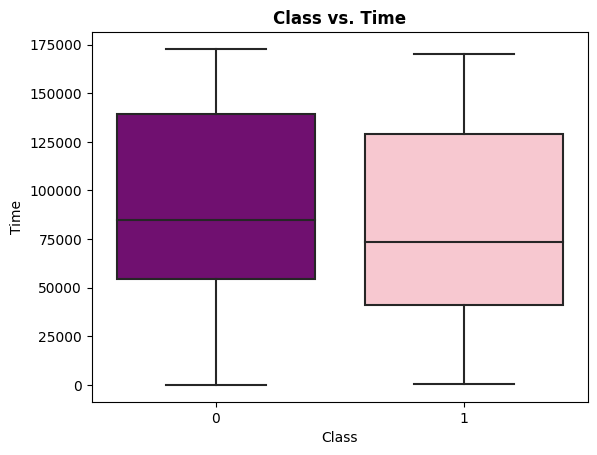

In [16]:
colors = ['purple', 'pink']
sns.boxplot(x=df['Class'], y=df['Time'], palette=colors)
plt.title('Class vs. Time', weight='bold');

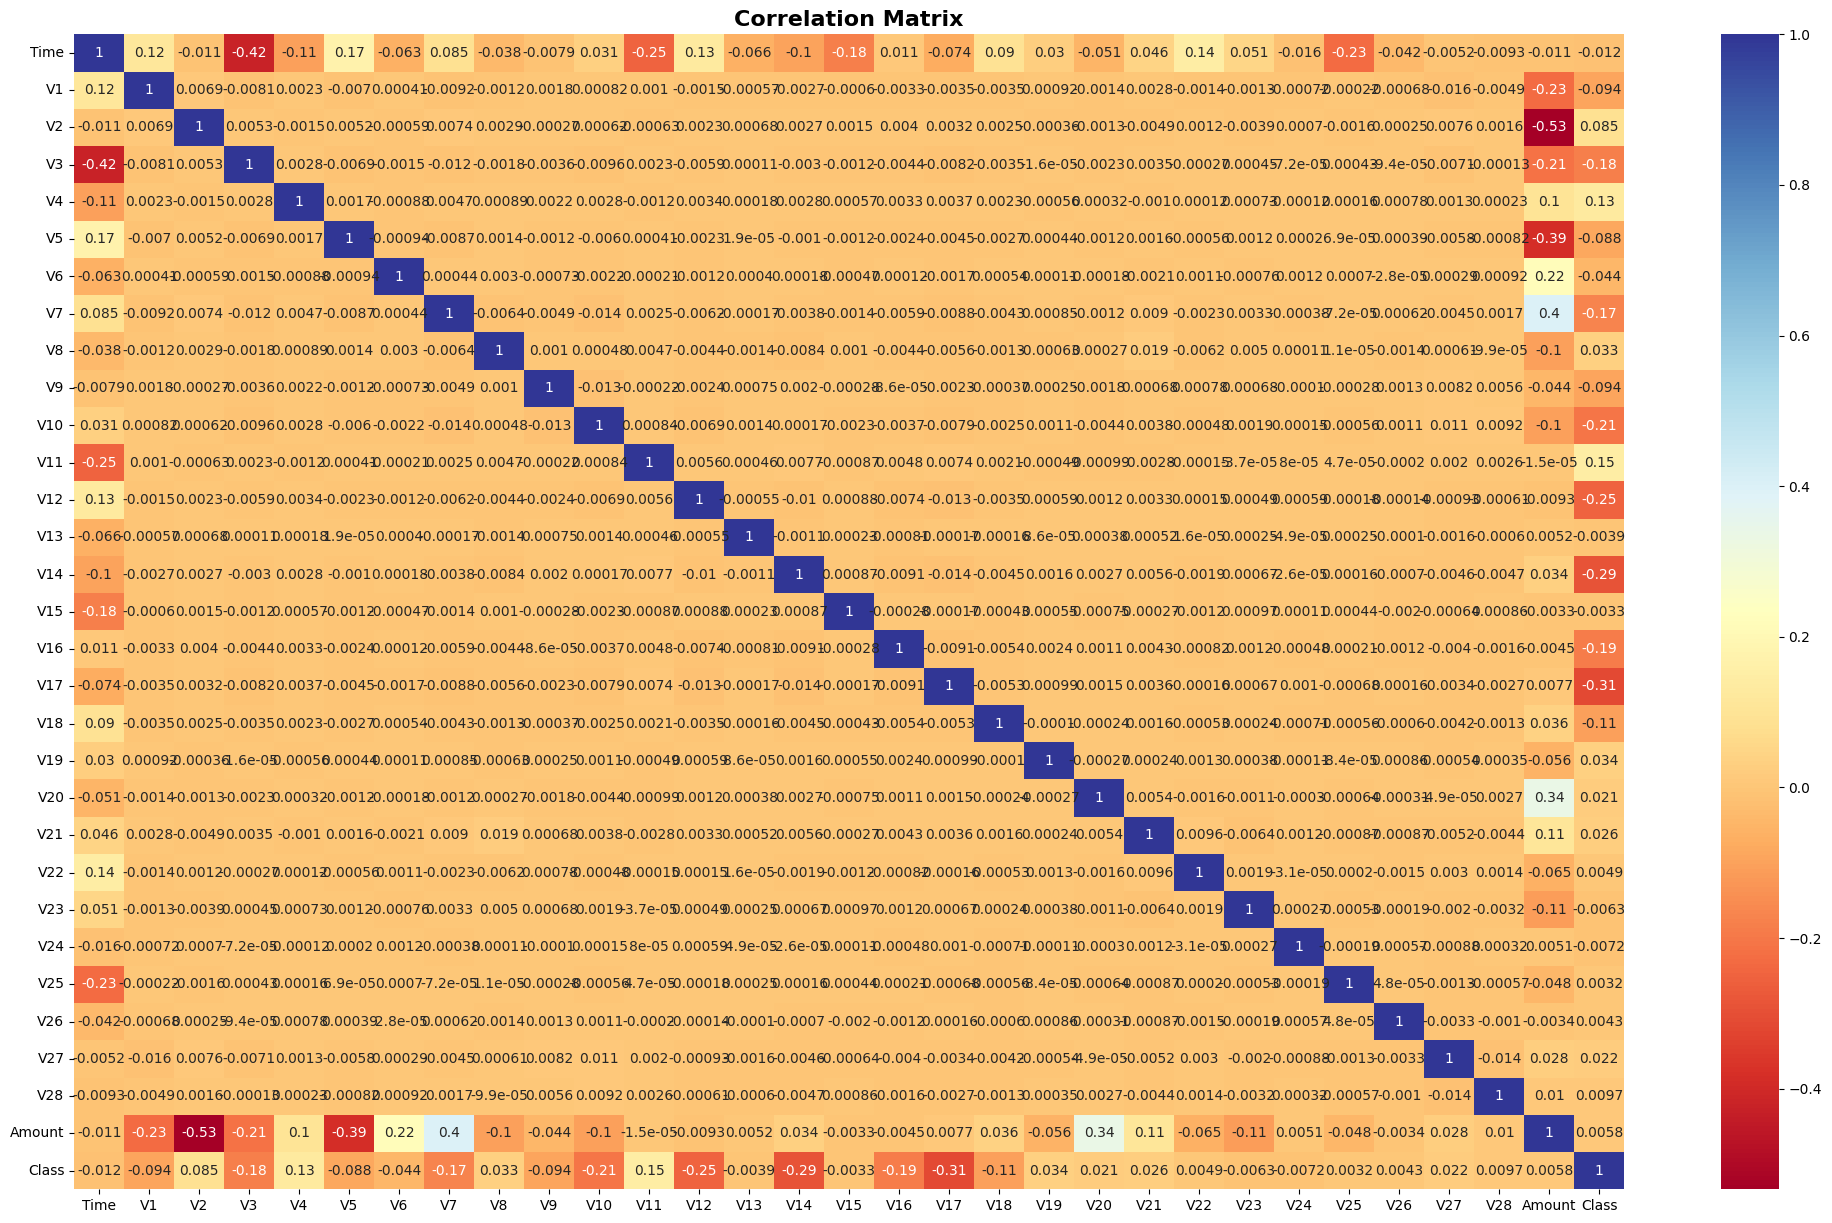

In [17]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(25,15))
plt.title('Correlation Matrix', weight='bold', fontsize=16)
df_corr_matrix = df.corr()
sns.heatmap(df_corr_matrix, cmap='RdYlBu', annot=True);

##**Data Preprocessing**

In [18]:
# Separating dependent and independent columns
X = df.drop('Class', axis=1)
y = df['Class']

In [19]:
# Splitting the data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

###**Feature Scaling**

In [20]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [21]:
X.shape, X_train_scaled.shape

((283726, 30), (226980, 30))

In [22]:
X_test_scaled.shape

(56746, 30)

##**Modelling**
- `Random Forest`
- `Logistic Regression`

###**Random Forest**

In [23]:
model1 = RandomForestClassifier()
model1.fit(X_train_scaled, y_train)
y_preds = model1.predict(X_test_scaled)
print(model1.score(X_train_scaled, y_train))
print(model1.score(X_test_scaled, y_test))

1.0
0.9995065731505305


In [24]:
def evaluate_preds(y_test, y_preds):
  accuracy = accuracy_score(y_test, y_preds)
  precision = precision_score(y_test, y_preds)
  recall = recall_score(y_test, y_preds)
  f1 = f1_score(y_test, y_preds)
  metric_dict = {'accuracy': round(accuracy, 2),
                 'precision': round(precision, 2),
                 'recall': round(recall, 2),
                 'f1': round(f1, 2)}
  print(f'Accuracy: {accuracy*100:.2f}%')
  print(f'Precision: {precision*100:.2f}%')
  print(f'Recall: {recall*100:.2f}%')
  print(f'F1 score: {f1*100:.2f}%')

  return metric_dict

In [25]:
rf = evaluate_preds(y_test, y_preds)
rf

Accuracy: 99.95%
Precision: 96.97%
Recall: 71.11%
F1 score: 82.05%


{'accuracy': 1.0, 'precision': 0.97, 'recall': 0.71, 'f1': 0.82}

In [26]:
print(f'Classification report: Random Forest')
print(classification_report(y_test, y_preds))

Classification report: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.71      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [31]:
conf_mat = confusion_matrix(y_test, y_preds)

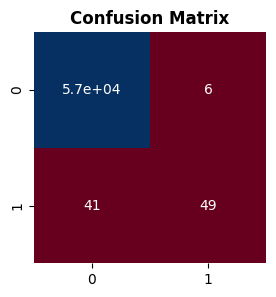

In [47]:
def plot_conf_mat(conf_mat):
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(conf_mat, annot=True, cbar=False, cmap='RdBu')
  plt.xlabel='True Label'
  plt.ylabel='Predicted Label'
  plt.title('Confusion Matrix', weight='bold')
plot_conf_mat(conf_mat)

###**Logistic Regression**

In [42]:
model2 = LogisticRegression(max_iter=100)
model2.fit(X_train_scaled, y_train)
y_preds = model2.predict(X_test_scaled)
print(model2.score(X_train_scaled, y_train))
print(model2.score(X_test_scaled, y_test))

0.9991981672394044
0.9991717477883904


In [43]:
lr_model = evaluate_preds(y_test, y_preds)
lr_model

Accuracy: 99.92%
Precision: 89.09%
Recall: 54.44%
F1 score: 67.59%


{'accuracy': 1.0, 'precision': 0.89, 'recall': 0.54, 'f1': 0.68}

In [44]:
print(f'Classification report: Logistic Regression')
print(classification_report(y_test, y_preds))

Classification report: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.54      0.68        90

    accuracy                           1.00     56746
   macro avg       0.95      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746



In [45]:
conf_mat = confusion_matrix(y_test, y_preds)

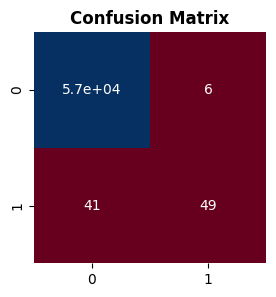

In [48]:
plot_conf_mat(conf_mat)

##**Conclusion**
I investigated and checked unbalanced data, visualied and understood relationship between different features. The data was split it two parts, a train and a test set.

The performance of model have evaluated by using accuracy, precison, recall and f1 score. The accuracy obtained is 99.92%.